In [38]:

from wid_tools import WIDDoughMaker
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Goals:
 - Investigate what whiskey asset classes malt/grain/first-fill/refill/etc, distilleries, and ages of product are most ripe for investment and probable gain
 
# Tools:
The WIDDoughMaker fetches assets (aka pitches) and their respective price histories. Afterwards, exploratory data analysis via python

# Sample price chart
[Click me](https://www.whiskyinvestdirect.com/tullibardine/2015/Q4/BBF/chart.do)

In [2]:
p = WIDDoughMaker()
p.setUp()

# log in might not be necessary to fetch chart data, only to make bids
#p.login()
p.get_pitches()


Num of pitches:96


In [3]:
p.pitches().head()


,barrelTypeCode,bondQuarter,bondYear,categoryName,considerationCurrency,distillery,securityId
0,HHR,Q4,2017,GRAIN,GBP,cameronbridge,SPIRIT000207
2,HHR,Q3,2017,GRAIN,GBP,cameronbridge,SPIRIT000196
4,HHR,Q4,2016,GRAIN,GBP,cameronbridge,SPIRIT000174
6,HHR,Q3,2015,GRAIN,GBP,cameronbridge,SPIRIT000156
8,HHR,Q4,2014,GRAIN,GBP,cameronbridge,SPIRIT000119


In [4]:
chart_df = pd.DataFrame()
failed_records = []

for r in p.pitches().iterrows():
    try:
        chart_df = pd.concat([p.get_chart_data(r[1].to_dict()),chart_df])
    except:
        failed_records.append(r[1].to_dict())

chart_df.head()


,day,dealDate,priceAvg,dummy,barrelTypeCode,bondQuarter,bondYear,categoryName,considerationCurrency,distillery,securityId
0,65,2016-01-18,3.92,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130
1,66,2016-01-19,3.90,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130
2,67,2016-01-20,3.90,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130
3,68,2016-01-21,3.91,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130
4,69,2016-01-22,3.91,1,BBF,Q4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130


In [5]:
chart_df.to_csv('pitch_history_3_19_2018.csv',index=False)

In [32]:
cask_types = pd.read_csv('cask_types.csv')
chart_df = pd.read_csv('pitch_history_3_18_2018.csv')

chart_df['bondQuarter'] = chart_df['bondQuarter'].apply(lambda x: int(x[1]))
chart_df['yrqtr'] = chart_df.apply(lambda x: int(x['bondYear'])*10+int(x['bondQuarter']),axis=1)
chart_df['label'] = chart_df.apply(lambda x: "{}_{}_{}".format(*[x['distillery'],x['barrelTypeCode'],x['yrqtr']]) ,axis=1)

chart_df = chart_df.merge(cask_types,on='barrelTypeCode')
chart_df.head()

,day,dealDate,priceAvg,dummy,barrelTypeCode,bondQuarter,bondYear,categoryName,considerationCurrency,distillery,securityId,yrqtr,label,barrelType
0,65,2016-01-18,3.92,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill
1,66,2016-01-19,3.90,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill
2,67,2016-01-20,3.90,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill
3,68,2016-01-21,3.91,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill
4,69,2016-01-22,3.91,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill


In [33]:
chart_df_first_date = chart_df.sort_values('dealDate').groupby(['securityId']).agg({'dealDate':'min'}).reset_index()

chart_df_first_rate = chart_df_first_date.merge(chart_df[['securityId','dealDate','priceAvg']],on=['securityId','dealDate'])

chart_df_norm = chart_df.merge(chart_df_first_rate,on=['securityId'],suffixes=('','_first'))
chart_df_norm['norm_price'] = chart_df_norm['priceAvg']/chart_df_norm['priceAvg_first']

chart_df_norm.head()

,day,dealDate,priceAvg,dummy,barrelTypeCode,bondQuarter,bondYear,categoryName,considerationCurrency,distillery,securityId,yrqtr,label,barrelType,dealDate_first,priceAvg_first,norm_price
0,65,2016-01-18,3.92,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,1.000000
1,66,2016-01-19,3.90,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.994898
2,67,2016-01-20,3.90,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.994898
3,68,2016-01-21,3.91,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.997449
4,69,2016-01-22,3.91,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.997449


In [34]:
recent_vintages = chart_df_norm[chart_df_norm['yrqtr'] > 20152]

recent_vintages.head()

,day,dealDate,priceAvg,dummy,barrelTypeCode,bondQuarter,bondYear,categoryName,considerationCurrency,distillery,securityId,yrqtr,label,barrelType,dealDate_first,priceAvg_first,norm_price
0,65,2016-01-18,3.92,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,1.000000
1,66,2016-01-19,3.90,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.994898
2,67,2016-01-20,3.90,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.994898
3,68,2016-01-21,3.91,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.997449
4,69,2016-01-22,3.91,1,BBF,4,2015,SINGLE_MALT,GBP,tullibardine,SPIRIT000130,20154,tullibardine_BBF_20154,Bourbon First Fill,2016-01-18,3.92,0.997449


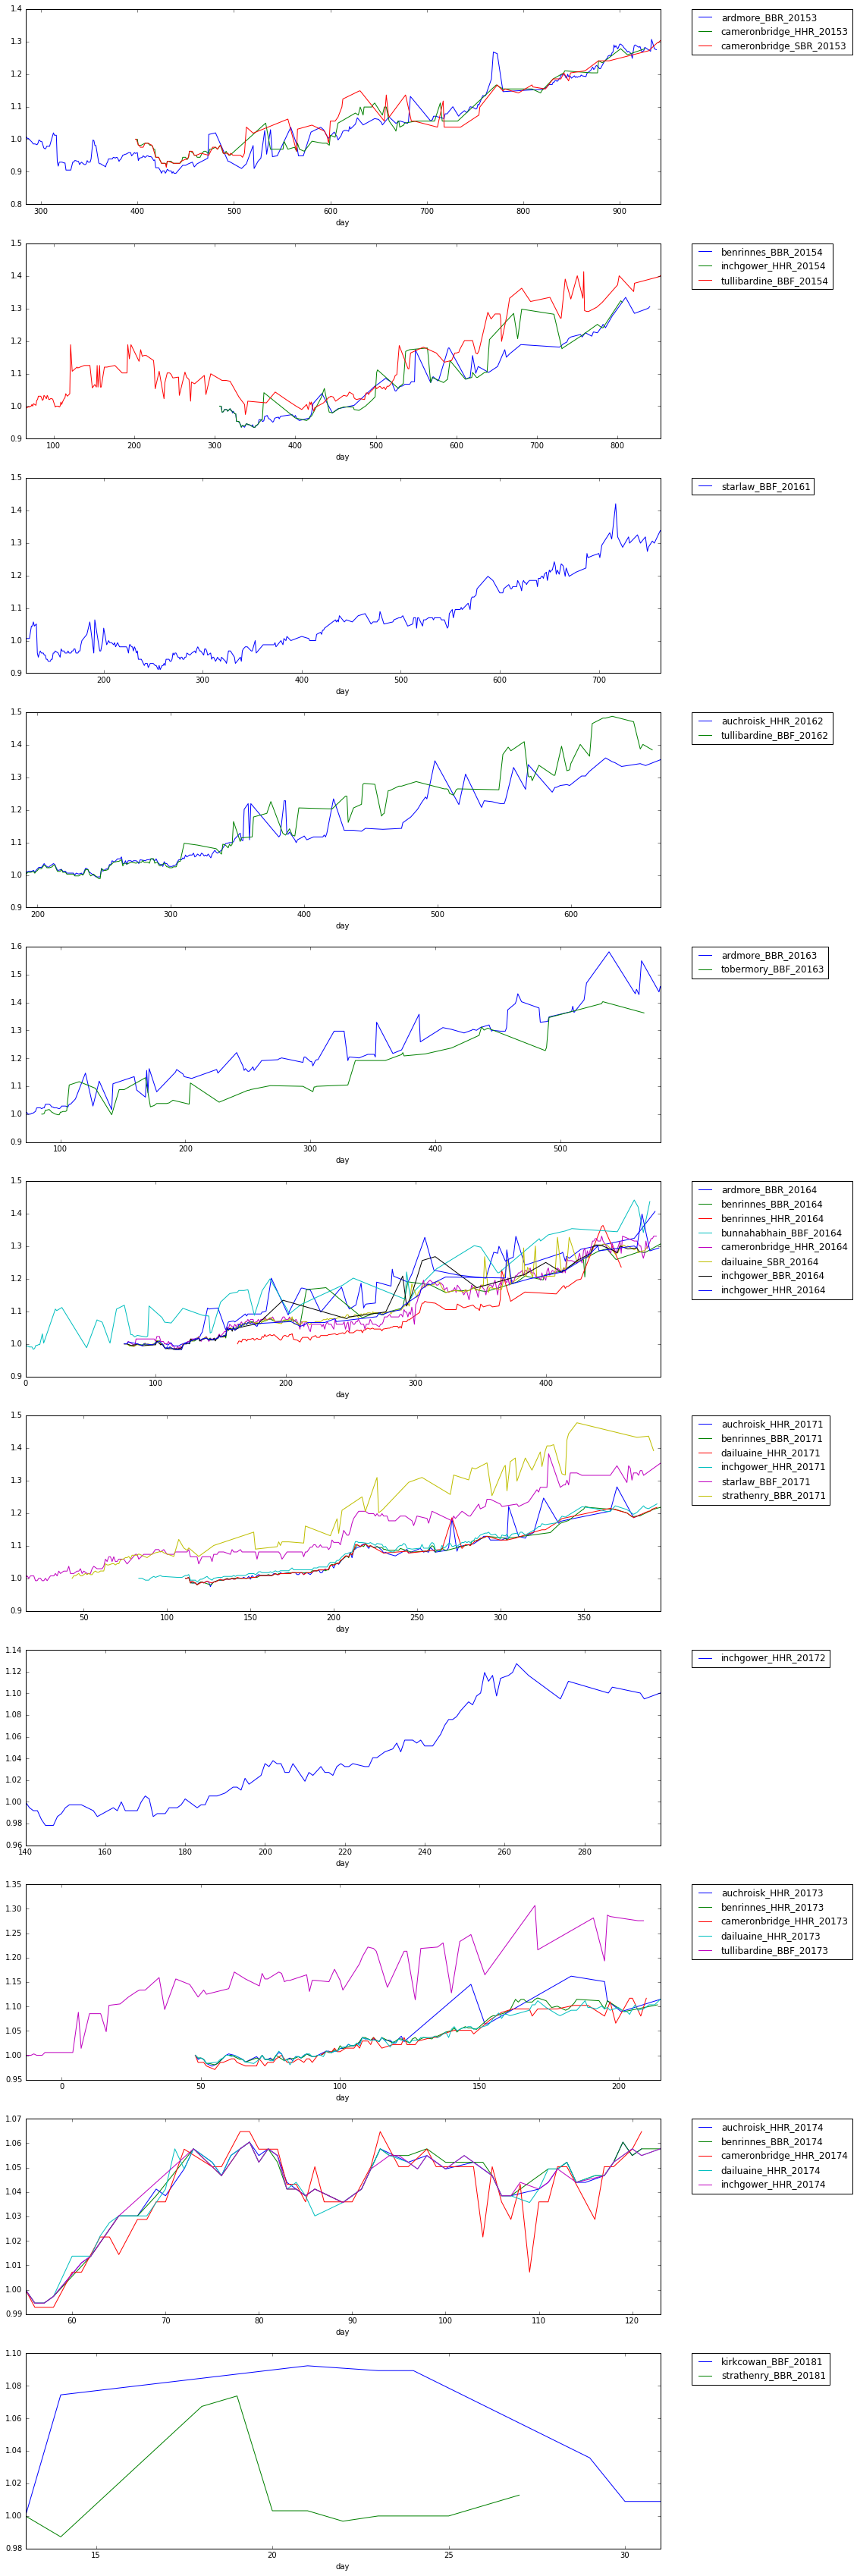

In [51]:
vintage_grouping = recent_vintages.groupby('yrqtr')

fig, ax = plt.subplots(len(vintage_grouping),figsize=(15,60))

plot_counter = 0
for yrqtr_label, yrqtr_grp in vintage_grouping:
    for spirit_label, spirit_grp in yrqtr_grp.groupby('label'):
        spirit_grp.plot(x = 'day', y = 'norm_price',ax = ax[plot_counter], label = spirit_label)
        ax[plot_counter].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plot_counter += 1
plt.show()

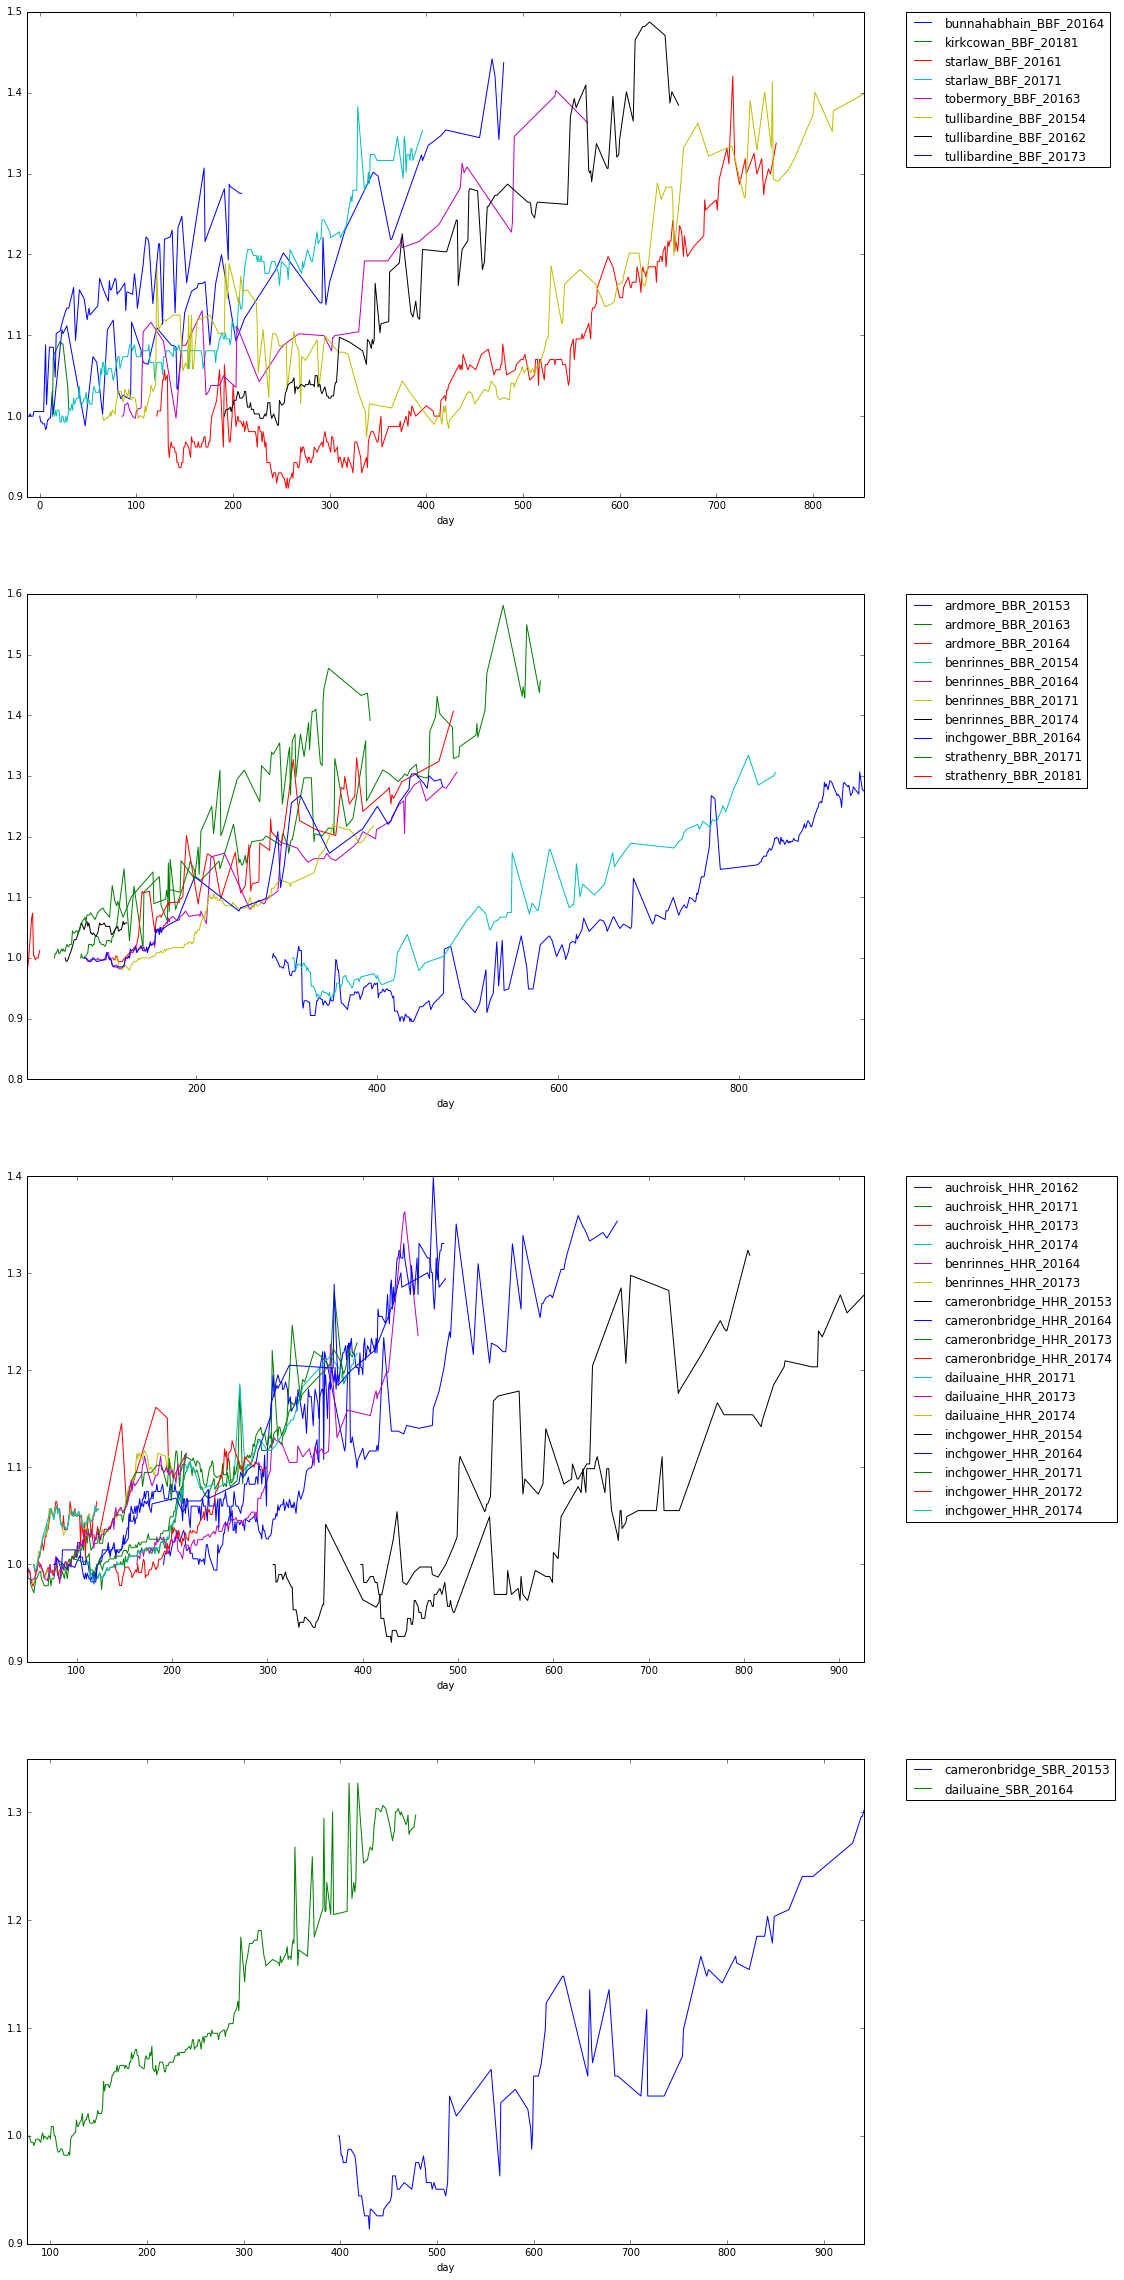

In [53]:
barrel_grouping = recent_vintages.groupby('barrelTypeCode')

fig, ax = plt.subplots(len(barrel_grouping),figsize=(15,40))

plot_counter = 0
for yrqtr_label, yrqtr_grp in barrel_grouping:
    for spirit_label, spirit_grp in yrqtr_grp.groupby('label'):
        spirit_grp.plot(x = 'day', y = 'norm_price',ax = ax[plot_counter], label = spirit_label)
        ax[plot_counter].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plot_counter += 1
plt.show()

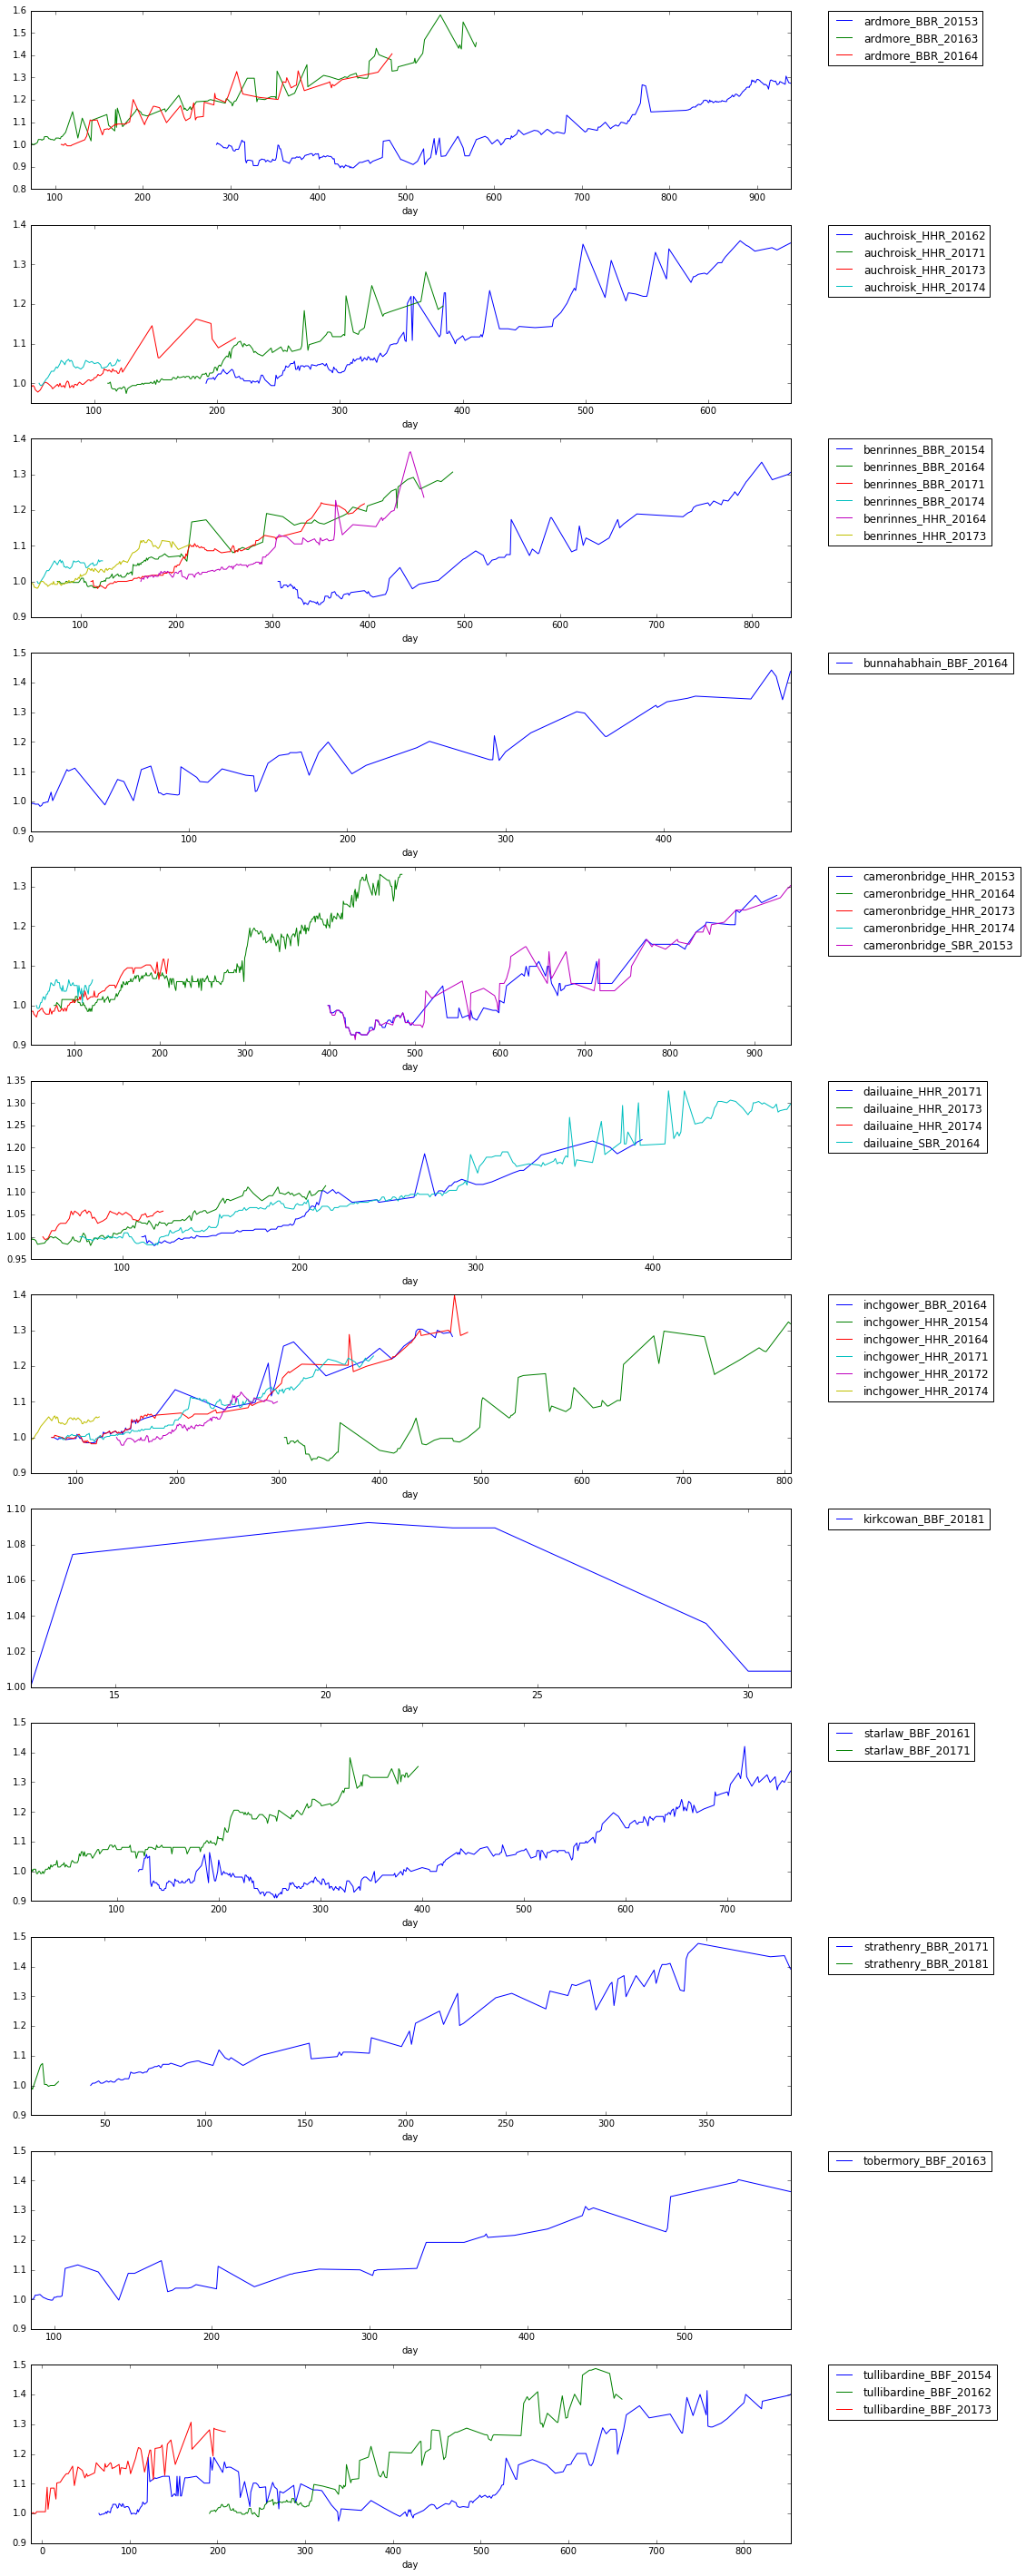

In [55]:
distillery_grouping = recent_vintages.groupby('distillery')

fig, ax = plt.subplots(len(distillery_grouping),figsize=(15,50))

plot_counter = 0
for yrqtr_label, yrqtr_grp in distillery_grouping:
    for spirit_label, spirit_grp in yrqtr_grp.groupby('label'):
        spirit_grp.plot(x = 'day', y = 'norm_price',ax = ax[plot_counter], label = spirit_label)
        ax[plot_counter].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plot_counter += 1
plt.show()